## Import libraries

In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
from change_detection import functions as chg
from ebmdatalab import bq
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

/home/app/notebook/lib/outliers.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Run OpenPrescribing Change Detection on Lidocaine Measure for practices

In [2]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
practice_class = chg.ChangeDetection('practice_data_lplido%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no')
practice_class.run()

## Import results

In [3]:
lidocaine = practice_class.concatenate_outputs()
lidocaine.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure                   name                                             
practice_data_lplidocaine A81001  0         NaN        NaN                 
                          A81002  2          20.0       20.0               
                          A81004  0         NaN        NaN                 
                          A81005  0         NaN        NaN                 
                          A81006  2          30.0       30.0               

                                  is.tfirst.pknown.offs  is.tfirst.offs  \
measure                   name                                            
practice_data_lplidocaine A81001 NaN                    NaN               
                          A81002  20.0                   20.0             
                          A81004 NaN                    NaN               
                          A81005 NaN                    NaN               
                          A81006  30.0                   30.0             

                                  is.tfirst.big  is.slope.ma  \
measure                   name                                 
practice_data_lplidocaine A81001 NaN            NaN            
                          A81002  20.0          -0.492132      
                          A81004 NaN            NaN            
                          A81005 NaN            NaN            
                          A81006  30.0          -0.331177      

                                  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure                   name                                             
practice_data_lplidocaine A81001 NaN               NaN                     
                          A81002 -0.011134          0.512195               
                          A81004 NaN               NaN                     
                          A81005 NaN               NaN                     
                          A81006 -0.006054          0.516129               

                                  is.intlev.initlev  is.intlev.finallev  \
measure                   name                                            
practice_data_lplidocaine A81001 NaN                NaN                   
                          A81002  44.693911          24.516511            
                          A81004 NaN                NaN                   
                          A81005 NaN                NaN                   
                          A81006  55.037624          44.771145            

                                  is.intlev.levd  is.intlev.levdprop  
measure                   name                                        
practice_data_lplidocaine A81001 NaN             NaN                  
                          A81002  20.177400       0.451457            
                          A81004 NaN             NaN                  
                          A81005 NaN             NaN                  
                          A81006  10.266479       0.186536

### Get list to filter closed practices

In [4]:
query = """
SELECT
  DISTINCT code
FROM
  ebmdatalab.hscic.practices
WHERE
  status_code = "A"
"""
open_practices = bq.cached_read(query,csv_path='data/open_practices.csv')
open_practices.head()

,code
0,W94622
1,W92025
2,W95036
3,W92031
4,W92033


In [5]:
### Get practice list to filter small list sizes

In [6]:
query = """
SELECT
  DISTINCT practice
FROM
  ebmdatalab.hscic.practice_statistics
WHERE
  total_list_size < 2000
"""
small_list_size = bq.cached_read(query,csv_path='data/small_list_size.csv')
small_list_size.head()

,practice
0,Y00031
1,Y00613
2,Y02313
3,Y02797
4,Y02926


### Remove small list sizes and closed/dormant practices

In [7]:
print(len(lidocaine))
mask = lidocaine.index.get_level_values(1).isin(open_practices['code'])
lidocaine = lidocaine.loc[mask]
print(len(lidocaine))
mask = lidocaine.index.get_level_values(1).isin(small_list_size['practice'])
lidocaine = lidocaine.loc[~mask]
print(len(lidocaine))
lidocaine.head()

7186
6624
6423


is.nbreak  is.tfirst  is.tfirst.pknown  \
measure                   name                                             
practice_data_lplidocaine A81001  0         NaN        NaN                 
                          A81002  2          20.0       20.0               
                          A81004  0         NaN        NaN                 
                          A81005  0         NaN        NaN                 
                          A81006  2          30.0       30.0               

                                  is.tfirst.pknown.offs  is.tfirst.offs  \
measure                   name                                            
practice_data_lplidocaine A81001 NaN                    NaN               
                          A81002  20.0                   20.0             
                          A81004 NaN                    NaN               
                          A81005 NaN                    NaN               
                          A81006  30.0                   30.0             

                                  is.tfirst.big  is.slope.ma  \
measure                   name                                 
practice_data_lplidocaine A81001 NaN            NaN            
                          A81002  20.0          -0.492132      
                          A81004 NaN            NaN            
                          A81005 NaN            NaN            
                          A81006  30.0          -0.331177      

                                  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure                   name                                             
practice_data_lplidocaine A81001 NaN               NaN                     
                          A81002 -0.011134          0.512195               
                          A81004 NaN               NaN                     
                          A81005 NaN               NaN                     
                          A81006 -0.006054          0.516129               

                                  is.intlev.initlev  is.intlev.finallev  \
measure                   name                                            
practice_data_lplidocaine A81001 NaN                NaN                   
                          A81002  44.693911          24.516511            
                          A81004 NaN                NaN                   
                          A81005 NaN                NaN                   
                          A81006  55.037624          44.771145            

                                  is.intlev.levd  is.intlev.levdprop  
measure                   name                                        
practice_data_lplidocaine A81001 NaN             NaN                  
                          A81002  20.177400       0.451457            
                          A81004 NaN             NaN                  
                          A81005 NaN             NaN                  
                          A81006  10.266479       0.186536

## Results 
Column includes CCG Name (hyperlinked to OP website), month when change started, mean proprotional change and a plot

These are filtered:

- to only include practices that started within the highest 20% of all practices
- closed/dormant practices
- practices with list size smaller than 2000
-to remove any practices that have a short sudden spike that would lead the change detection algorithm to detect a sudden drop
 and then sorted according to the largest total measured drop.

,Month when change detected,Measured proportional change,plots
link,,,
CHURCH LANE SURGERY,2017-03-01,0.992899,
RYDINGS HALL SURGERY,2016-09-01,0.989399,
CENTRAL DALES PRACTICE,2017-04-01,0.986836,
DR RS DURSTON'S PRACTICE,2016-12-01,0.979509,
MELTHAM ROAD SURGERY,2017-04-01,0.947009,
FOREST HILL GROUP PRACTICE,2017-05-01,0.911712,
ST CLEMENTS PARTNERSHIP,2018-11-01,0.887805,
SUMMERCROFT SURGERY,2016-05-01,0.719287,
THE LIMES MEDICAL CENTRE,2018-03-01,0.691009,

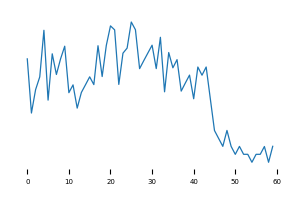
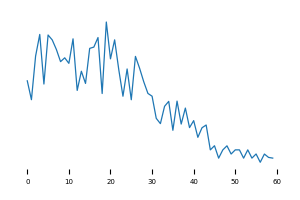
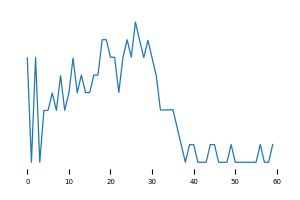
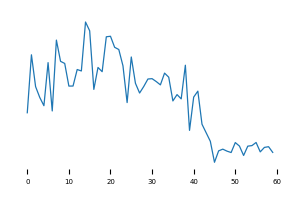
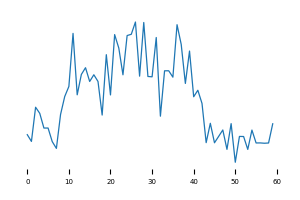
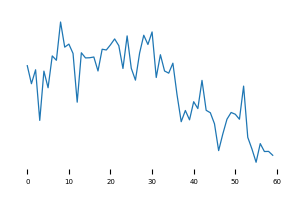
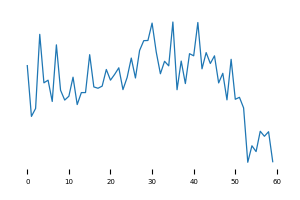
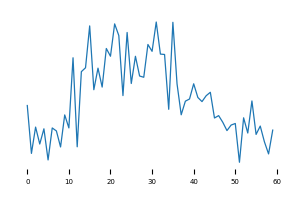
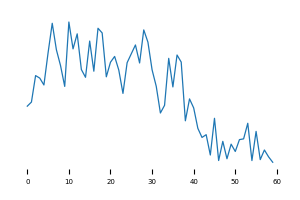
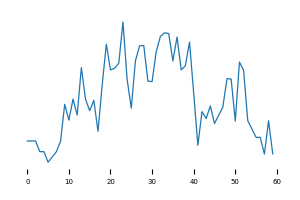

In [8]:

filtered_sparkline(lidocaine,
                   'practice_data_lplido/practice_data_lplidocaine',
                  'practice_data_lplidocaine')